In [1]:
#導入模組
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#資料輸入與觀察
from tensorflow.keras.datasets import fashion_mnist

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
np.max(x_train[1]),np.max(x_test[1])

(255, 255)

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

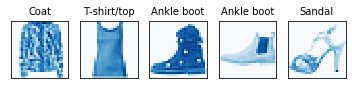

In [8]:
#選五個資料觀看
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Blues')

In [9]:
#修改資料格式
x_train=x_train.reshape(60000,28,28,1)/255
x_test=x_test.reshape(10000,28,28,1)/255
#將資料改成onehotencoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [10]:
#輸入模組
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [11]:
#打造CNN
model = Sequential()

In [12]:
##修改Conv2D裡的數量
model.add(Conv2D(16, (3,3), padding='same', 
                 input_shape=(28,28,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
##修改神經元數量與層數
model.add(Flatten())
model.add(Dense(108,activation='relu'))
model.add(Dense(211,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 128)         7

In [15]:
##修改learning rate
model.compile(loss='mse', optimizer=SGD(lr=0.87),metrics=['accuracy'])

In [16]:
##batch_size50個修正1次 epochs給他跑10次
model.fit(x_train, y_train, batch_size=50, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 40s 664us/sample - loss: 0.0552 - accuracy: 0.5386
Epoch 2/10
60000/60000 [==============================] - 41s 686us/sample - loss: 0.0254 - accuracy: 0.8217
Epoch 3/10
60000/60000 [==============================] - 41s 691us/sample - loss: 0.0206 - accuracy: 0.8558
Epoch 4/10
60000/60000 [==============================] - 41s 687us/sample - loss: 0.0182 - accuracy: 0.8740
Epoch 5/10
60000/60000 [==============================] - 41s 675us/sample - loss: 0.0166 - accuracy: 0.8859
Epoch 6/10
60000/60000 [==============================] - 41s 681us/sample - loss: 0.0155 - accuracy: 0.8946
Epoch 7/10
60000/60000 [==============================] - 41s 686us/sample - loss: 0.0146 - accuracy: 0.8999
Epoch 8/10
60000/60000 [==============================] - 42s 697us/sample - loss: 0.0139 - accuracy: 0.9049
Epoch 9/10
60000/60000 [==============================] - 39s 655us/sample - loss: 0.0133 - accuracy: 0.9

In [17]:
#平均都花了40s試試更改batch_size看能不能加快
model = Sequential()
model.add(Conv2D(16, (3,3), padding='same', 
                 input_shape=(28,28,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
model.add(Flatten())
model.add(Dense(108,activation='relu'))
model.add(Dense(211,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)        

In [20]:
model.compile(loss='mse', optimizer=SGD(lr=0.87),metrics=['accuracy'])

In [21]:
##batch_size500個修正1次 epochs給他跑10次
model.fit(x_train, y_train, batch_size=500, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 34s 563us/sample - loss: 0.0898 - accuracy: 0.1163
Epoch 2/10
60000/60000 [==============================] - 31s 522us/sample - loss: 0.0882 - accuracy: 0.2603
Epoch 3/10
60000/60000 [==============================] - 28s 475us/sample - loss: 0.0678 - accuracy: 0.4488
Epoch 4/10
60000/60000 [==============================] - 28s 459us/sample - loss: 0.0494 - accuracy: 0.6205
Epoch 5/10
60000/60000 [==============================] - 29s 488us/sample - loss: 0.0398 - accuracy: 0.7042
Epoch 6/10
60000/60000 [==============================] - 31s 516us/sample - loss: 0.0358 - accuracy: 0.7366
Epoch 7/10
60000/60000 [==============================] - 33s 549us/sample - loss: 0.0325 - accuracy: 0.7642
Epoch 8/10
60000/60000 [==============================] - 30s 493us/sample - loss: 0.0300 - accuracy: 0.7845
Epoch 9/10
60000/60000 [==============================] - 31s 520us/sample - loss: 0.0278 - accuracy: 0.8

In [22]:
##速度有加快，但正確率下降，將batch_size再更改一次試試
model = Sequential()
model.add(Conv2D(16, (3,3), padding='same', 
                 input_shape=(28,28,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [23]:
model.add(Flatten())
model.add(Dense(108,activation='relu'))
model.add(Dense(211,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)        

In [25]:
model.compile(loss='mse', optimizer=SGD(lr=0.87),metrics=['accuracy'])

In [26]:
##batch_size5000個修正1次 epochs給他跑10次
model.fit(x_train, y_train, batch_size=5000, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 30s 507us/sample - loss: 0.0900 - accuracy: 0.0883
Epoch 2/10
60000/60000 [==============================] - 26s 430us/sample - loss: 0.0899 - accuracy: 0.1262
Epoch 3/10
60000/60000 [==============================] - 28s 462us/sample - loss: 0.0899 - accuracy: 0.1868
Epoch 4/10
60000/60000 [==============================] - 30s 501us/sample - loss: 0.0898 - accuracy: 0.2140
Epoch 5/10
60000/60000 [==============================] - 29s 484us/sample - loss: 0.0897 - accuracy: 0.2292
Epoch 6/10
60000/60000 [==============================] - 25s 422us/sample - loss: 0.0896 - accuracy: 0.3024
Epoch 7/10
60000/60000 [==============================] - 26s 437us/sample - loss: 0.0896 - accuracy: 0.3493
Epoch 8/10
60000/60000 [==============================] - 30s 496us/sample - loss: 0.0894 - accuracy: 0.3675
Epoch 9/10
60000/60000 [==============================] - 30s 501us/sample - loss: 0.0893 - accuracy: 0.3

In [27]:
##發現batch_size上升到某一程度速度就上不去喏，然而正確率卻下降。想找一個速度快一些，但正確率不那麼低的。
model = Sequential()
model.add(Conv2D(16, (3,3), padding='same', 
                 input_shape=(28,28,1), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [28]:
model.add(Flatten())
model.add(Dense(108,activation='relu'))
model.add(Dense(211,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 128)        

In [30]:
model.compile(loss='mse', optimizer=SGD(lr=0.87),metrics=['accuracy'])

In [31]:
##batch_size200個修正1次 epochs給他跑10次
model.fit(x_train, y_train, batch_size=200, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 35s 586us/sample - loss: 0.0787 - accuracy: 0.3286
Epoch 2/10
60000/60000 [==============================] - 36s 602us/sample - loss: 0.0431 - accuracy: 0.6778
Epoch 3/10
60000/60000 [==============================] - 36s 602us/sample - loss: 0.0336 - accuracy: 0.7570
Epoch 4/10
60000/60000 [==============================] - 35s 591us/sample - loss: 0.0286 - accuracy: 0.7963
Epoch 5/10
60000/60000 [==============================] - 34s 567us/sample - loss: 0.0251 - accuracy: 0.8231
Epoch 6/10
60000/60000 [==============================] - 33s 552us/sample - loss: 0.0227 - accuracy: 0.8415
Epoch 7/10
60000/60000 [==============================] - 36s 599us/sample - loss: 0.0210 - accuracy: 0.8527
Epoch 8/10
60000/60000 [==============================] - 36s 603us/sample - loss: 0.0198 - accuracy: 0.8620
Epoch 9/10
60000/60000 [==============================] - 36s 608us/sample - loss: 0.0188 - accuracy: 0.8

In [32]:
##這次不管是秒數或是正確率都介於中間，就用他吧!
#預測
result = model.predict_classes(x_test)

In [33]:
def my_predict(n):
  print ('My prediction is', class_names[result[n]])
  x = x_test[n].reshape(28,28)
  plt.imshow(x, cmap='Blues')

My prediction is Dress


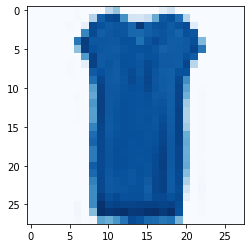

In [35]:
my_predict(9211)

In [37]:
from ipywidgets import interact_manual
interact_manual(my_predict,n=(0,9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

In [38]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 193us/sample - loss: 0.0199 - accuracy: 0.8619


In [39]:
loss, acc = score

In [40]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.8619


In [41]:
model.save('myCNNmodel.h5')